ARTI308 - Machine Learning

# Lab 3: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

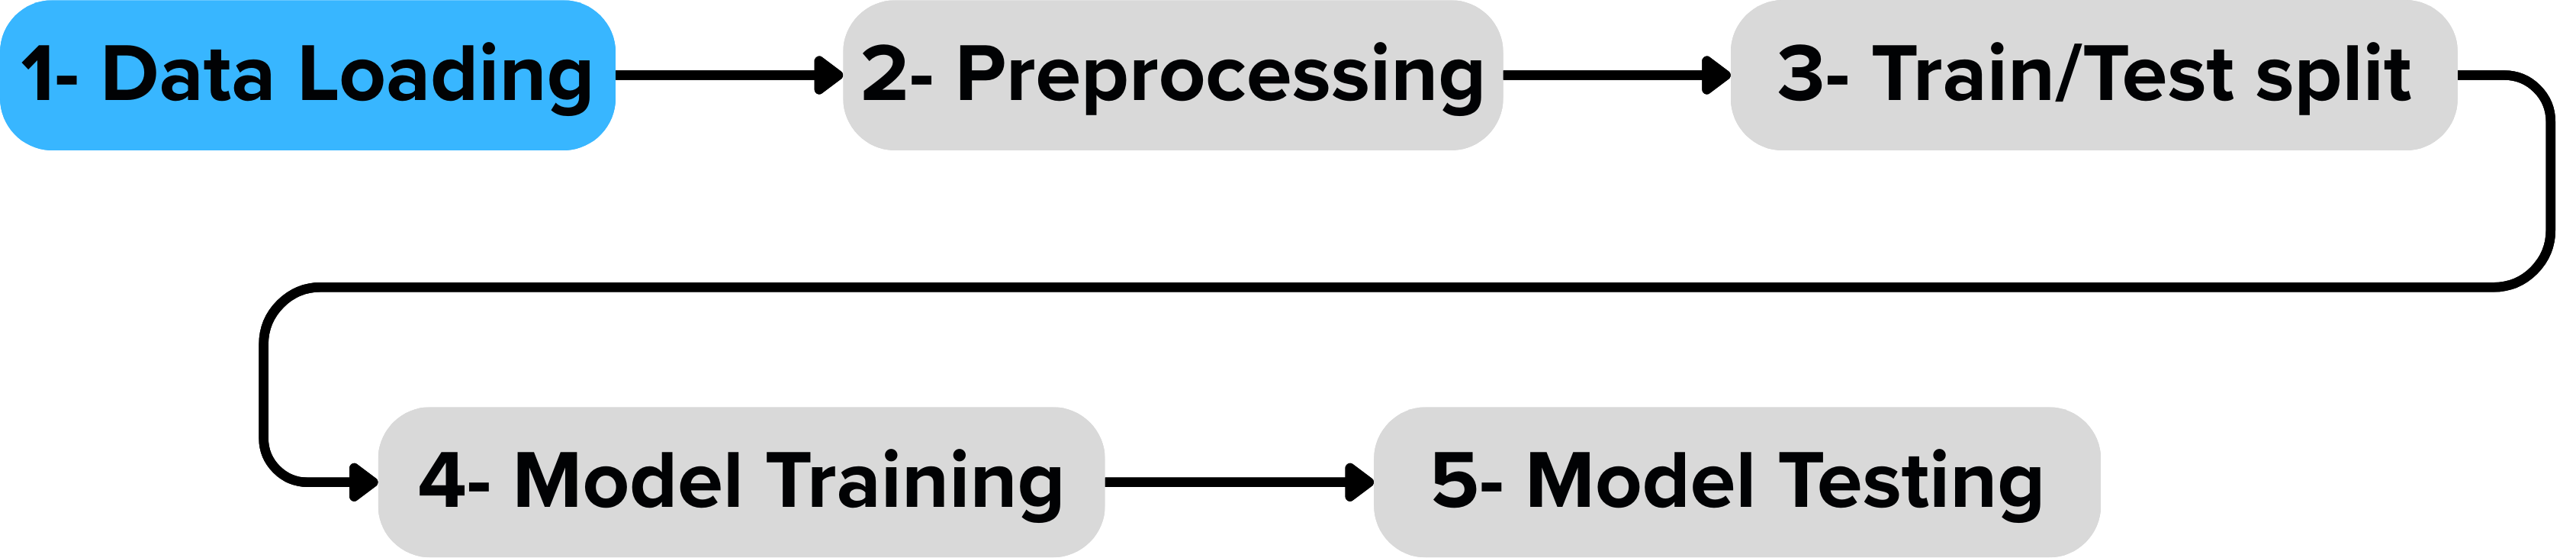

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [2]:
# Load Dataset

df = pd.read_csv("../student+performance/student/student-mat.csv", sep=";")

# Display first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Check Missing Values

In [3]:
# Check all values
print(df.isna())

     school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
390   False  False  False    False    False    False  False  False  False   
391   False  False  False    False    False    False  False  False  False   
392   False  False  False    False    False    False  False  False  False   
393   False  False  False    False    False    False  False  False  False   
394   False  False  False    False    False    False  False  False  False   

      Fjob  ...  famrel  freetime  goout   Dalc   Walc  health  absences  \

In [4]:
print(df.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


### Check duplicate rows

In [5]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

Series([], dtype: bool)

### No. of rows and columns

In [6]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (395, 33) 

number of rows:  395
number of columns:  33


### Data type of columns

In [7]:
# viewing the data types of columns
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
# Convert G1 and G2 to numeric (they are stored as strings in the CSV)
df['G1'] = pd.to_numeric(df['G1'])
df['G2'] = pd.to_numeric(df['G2'])

df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

### Descriptive summary Statistics

In [9]:
# Statistical summary
df.describe(include='all')

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


### Univariate Analysis

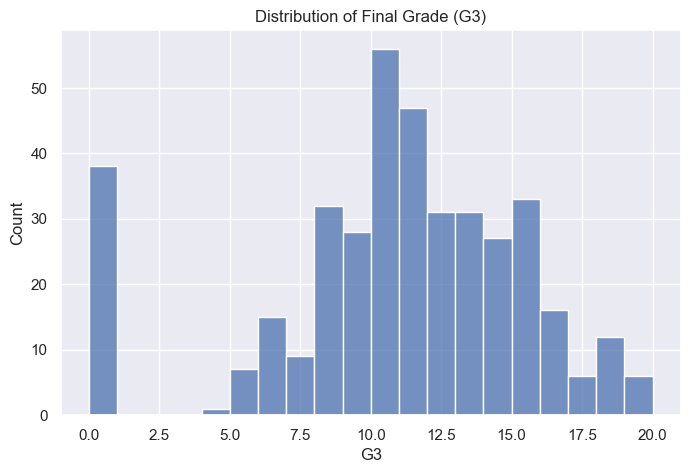

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=20)
plt.title("Distribution of Final Grade (G3)")
plt.show()

- Shows how final grades (G3) are distributed
- A spike at 0 may indicate students who dropped out

### Distribution of Absences

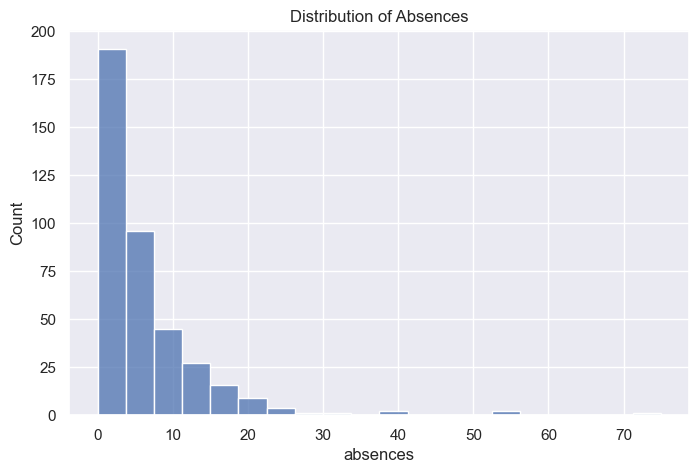

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df['absences'], bins=20)
plt.title("Distribution of Absences")
plt.show()

## Bivariate Analysis

### Average Final Grade by Sex

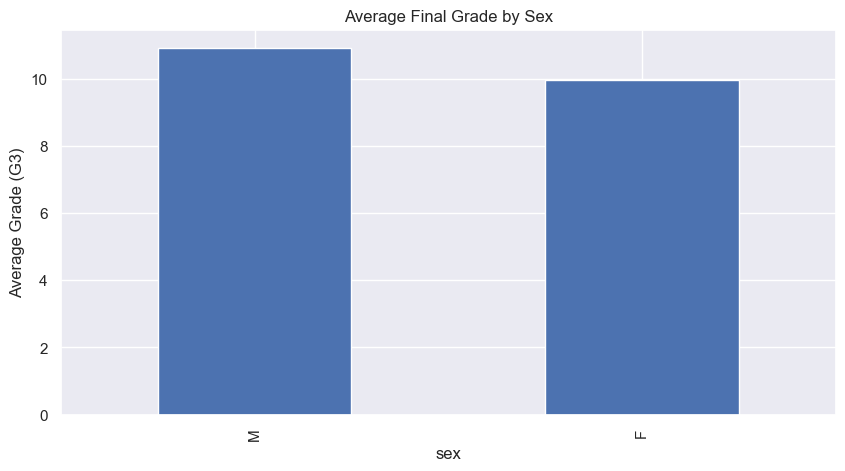

sex
M    10.914439
F     9.966346
Name: G3, dtype: float64

In [12]:
grade_by_sex = df.groupby('sex')['G3'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
grade_by_sex.plot(kind='bar')
plt.title("Average Final Grade by Sex")
plt.ylabel("Average Grade (G3)")
plt.show()

grade_by_sex

### Average Final Grade by Mother's Job

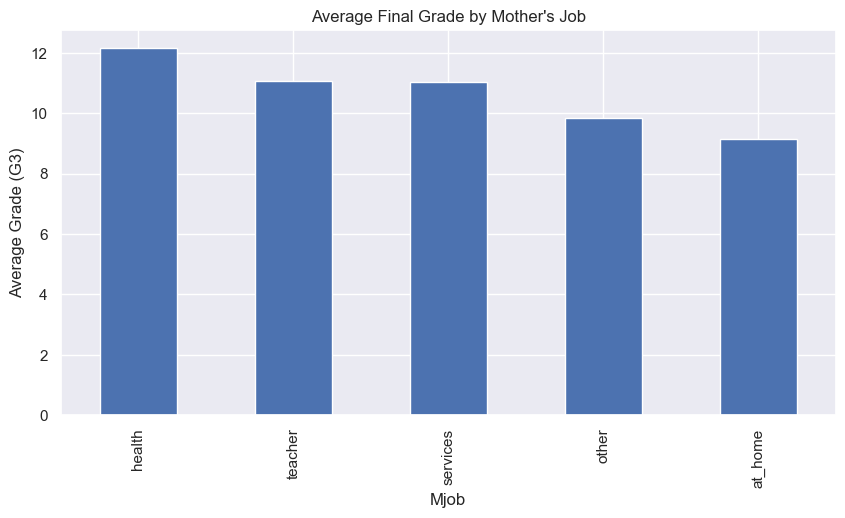

Mjob
health      12.147059
teacher     11.051724
services    11.019417
other        9.822695
at_home      9.152542
Name: G3, dtype: float64

In [13]:
grade_by_mjob = df.groupby('Mjob')['G3'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
grade_by_mjob.plot(kind='bar')
plt.title("Average Final Grade by Mother's Job")
plt.ylabel("Average Grade (G3)")
plt.show()

grade_by_mjob

### Average Final Grade by Study Time

In [14]:
grade_by_studytime = df.groupby('studytime')['G3'].mean().sort_values(ascending=False)

grade_by_studytime

studytime
3    11.400000
4    11.259259
2    10.171717
1    10.047619
Name: G3, dtype: float64

### Absences vs Final Grade Relationship

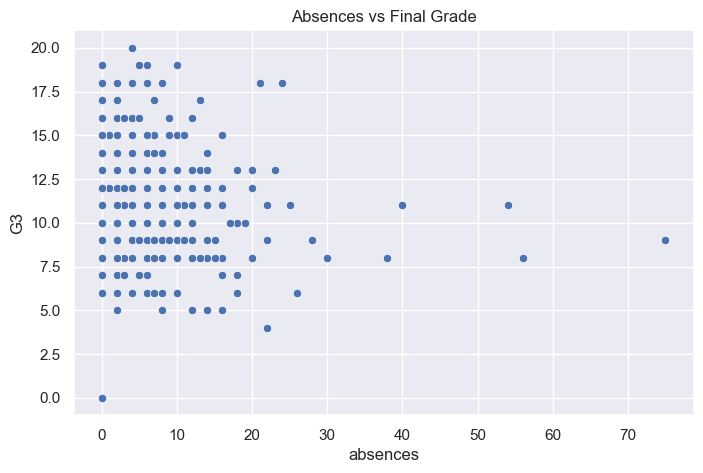

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade")
plt.show()

### Correlation Matrix

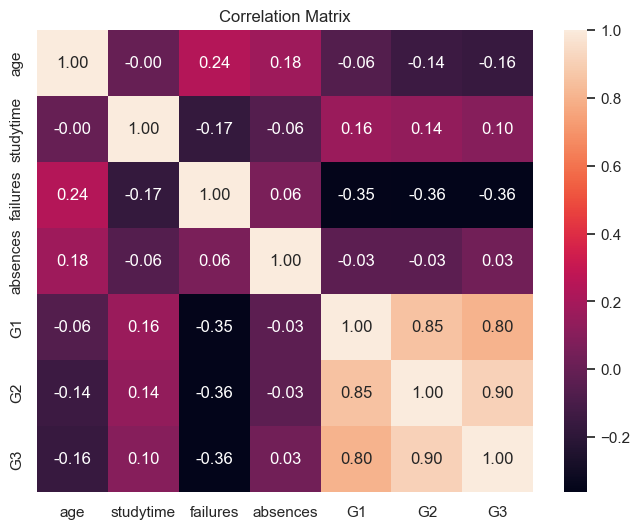

In [16]:
plt.figure(figsize=(8,6))
numeric_cols = ['age', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship
- G1, G2, G3 are highly correlated as expected (grades across periods)

## Grade Progression Analysis
### Average Grade Across Periods (G1 → G2 → G3)

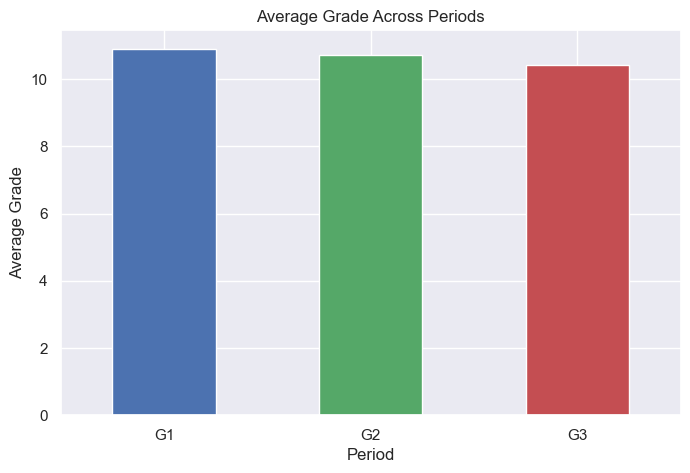

G1    10.908861
G2    10.713924
G3    10.415190
dtype: float64

In [17]:
grade_means = df[['G1', 'G2', 'G3']].mean()

plt.figure(figsize=(8,5))
grade_means.plot(kind='bar', color=['#4C72B0', '#55A868', '#C44E52'])
plt.title("Average Grade Across Periods")
plt.ylabel("Average Grade")
plt.xlabel("Period")
plt.xticks(rotation=0)
plt.show()

grade_means

# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the dataset file with your notebook.


End of lab 3.